In [1]:
!pip install signate

from googleapiclient.discovery import build
import io, os
from googleapiclient.http import MediaIoBaseDownload
from google.colab import auth


auth.authenticate_user()

drive_service = build('drive', 'v3')
results = drive_service.files().list(
        q="name = 'signate.json'", fields="files(id)").execute()
signate_api_key = results.get('files', [])

filename = "/root/.signate/signate.json"
os.makedirs(os.path.dirname(filename), exist_ok=True)

request = drive_service.files().get_media(fileId=signate_api_key[0]['id'])
fh = io.FileIO(filename, 'wb')
downloader = MediaIoBaseDownload(fh, request)
done = False
while done is False:
    status, done = downloader.next_chunk()
    print("Download %d%%." % int(status.progress() * 100))
os.chmod(filename, 600)

     |████████████████████████████████| 138 kB 54.8 MB/s 
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=90cbb568e856bfd24dee691181a65f3a8853810aa46f20507c8ec7b2878806ed
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget
  Attempting uninstall: six
    Found existing installation: six 1.15.0
    Uninstalling six-1.15.0:
      Successfully uninstalled six-1.15.0
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.8 which is incompatible.
google-colab 1.0.0 requires six~=1.15.0, but you have six 1.16.0 which is 

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


Download 100%.


In [2]:
! signate list
! signate files --competition-id=409
! signate download --competition-id=409

  competitionId  title                                                                                      closing     prize                  submitters
---------------  -----------------------------------------------------------------------------------------  ----------  -------------------  ------------
              1  【練習問題】銀行の顧客ターゲティング                                                       -                                        5408
             24  【練習問題】お弁当の需要予測                                                               -                                        6682
             27  【練習問題】Jリーグの観客動員数予測                                                        -                                        1532
            100  【練習問題】手書き文字認識                                                                 -           Knowledge                     204
            102  【練習問題】タイタニックの生存予測                                                         -           Knowledge                    1269
 

In [3]:
# ディレクトリ内のデータの確認
%ls

adc.json  sample_data/  sample_submission.csv  test.csv  train.csv


In [4]:
# Googleドライブのマウント
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


         Date   Open   High    Low  Close  Up
0  2004-01-02  50.85  50.91  50.62  50.72   1
1  2004-01-05  50.75  50.84  50.61  50.79   1
2  2004-01-06  50.87  51.26  50.86  51.15   1
3  2004-01-07  51.45  51.54  51.29  51.51   0
4  2004-01-08  51.15  51.33  51.02  51.28   0
Date      object
Open     float64
High     float64
Low      float64
Close    float64
Up         int64
dtype: object
Date     0
Open     0
High     0
Low      0
Close    0
Up       0
dtype: int64
Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64
(1515, 5, 6) (503, 5, 6) (1196, 5, 6)
Epoch 1/10
64/64 [==============================] - 3s 11ms/step - loss: 0.6857 - accuracy: 0.5419 - val_loss: 0.6753 - val_accuracy: 0.5785
Epoch 2/10
64/64 [==============================] - 0s 5ms/step - loss: 0.6707 - accuracy: 0.5815 - val_loss: 0.6533 - val_accuracy: 0.6223
Epoch 3/10
64/64 [==============================] - 0s 5ms/step - loss: 0.6554 - accuracy: 0.6178 - val_loss: 0.6402 - val_accuracy: 0.6203
Ep

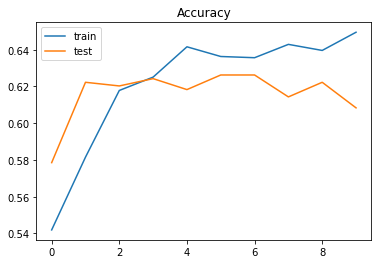

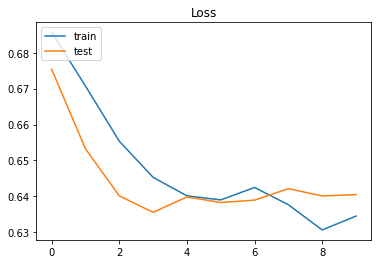

予測結果の先頭10件
[[0.8819928 ]
 [0.38121367]
 [0.6480175 ]
 [0.4773657 ]
 [0.22564283]
 [0.7503978 ]
 [0.1940688 ]
 [0.69314784]
 [0.7641102 ]
 [0.41745085]]
丸め込んだ予測結果の先頭10件
[[1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]] データ数：1196


In [74]:
'''
データの読み込みと確認
'''

# ライブラリのインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# ランダムシードの設定
import random
np.random.seed(1234)
random.seed(1234)

# データの読み込み
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv', header=None)

# データの確認
print(train.head())
print(train.dtypes)

# 欠損値の確認
print(train.isnull().sum())
print(test.isnull().sum())

'''
特徴量エンジニアリング
'''

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 学習データとテストデータの連結
df = pd.concat([train, test], sort=False).reset_index(drop=True)

""" 特徴量Bodyを追加 """

df['Body'] = df['Open'] - df['Close']


""" 特徴量Rateを追加 """

df['Rate'] = (df['Close'] - df['Close'].shift(1)) / df['Close'].shift(1)
df['Rate'] = df['Rate'].fillna(0)

""" 不要なカラムを削除 """

df = df.drop(['Date'], axis=1)

# trainとtestに再分割
train = df[~df['Up'].isnull()]
test = df[df['Up'].isnull()]

# 説明変数と目的変数を指定
X_train = train.drop(['Up'], axis=1)
Y_train = train['Up']
X_test = test.drop(['Up'], axis=1)
Y_test = test['Up']

# 学習データと検証データの分割
x_train, x_valid, y_train, y_valid = train_test_split(X_train, Y_train,
                                                      test_size=0.25, random_state=0,
                                                      shuffle=False)

# 関数get_standardized_tの定義
def get_standardized_t(X, num_date):
    X = np.array(X)
    X_t_list = []
    for i in range(len(X) - num_date + 1):
        X_t = X[i:i+num_date]
        scaler = StandardScaler()
        X_standardized = scaler.fit_transform(X_t)
        X_t_list.append(X_standardized)
    return np.array(X_t_list)

num_date = 5

# 関数get_standardized_tの呼び出し
x_train_t = get_standardized_t(X=x_train, num_date=num_date)
x_valid_t = get_standardized_t(X=x_valid, num_date=num_date)
X_test_t = get_standardized_t(X=X_test, num_date=num_date)

print(x_train_t.shape, x_valid_t.shape, X_test_t.shape)

# 目的変数の変形
y_train_t = y_train[num_date-1:]
y_valid_t = y_valid[num_date-1:]
Y_test_t = Y_test[num_date-1:]

'''
モデルの構築と評価
'''

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

# ネットワークの各層のサイズの定義
num_l1 = 100
num_l2 = 20
num_output = 1

# エポック数
epochs = 10

# バッチサイズ
batch_size=24


# Dropoutの割合の定義
dropout_rate = 0.25

# 以下、ネットワークを構築
model = Sequential()
# 第1層
model.add(LSTM(units=num_l1, activation='tanh', batch_input_shape=(None, x_train_t.shape[1], x_train_t.shape[2])))
model.add(Dropout(dropout_rate))
# 第2層
model.add(Dense(num_l2, activation='relu'))
model.add(Dropout(dropout_rate))
# 出力層
model.add(Dense(num_output, activation='sigmoid'))
# ネットワークのコンパイル
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# モデルの学習の実行
result = model.fit(x=x_train_t, y=y_train_t, epochs=epochs, batch_size=batch_size, validation_data=(x_valid_t, y_valid_t))

# モデルを評価
score = model.evaluate(x_valid_t, y_valid_t, verbose=1)
print('正解率=', score[1], 'loss=', score[0])

'''
学習過程のグラフ化
'''
    
# 正解率の推移をプロット
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# ロスの推移をプロット
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

"""
テストデータの予測
"""

from sklearn.metrics import accuracy_score

# 評価データの予測結果の算出
pred_prob = model.predict(X_test_t)

# 予測結果の先頭10件を確認
print('予測結果の先頭10件')
print(pred_prob[:10])

# 評価データの予測結果を0もしくは1に丸め込み
pred = np.round(pred_prob)

# 丸め込んだ予測結果の先頭10件を確認
print('丸め込んだ予測結果の先頭10件')
print(pred[:10], f'データ数：{len(pred)}')